# Exploratory Data Analysis (EDA)

### 1. [documentation links](#documentation links)
### 2. [Dataset location](#dataset)
### 3. [Loading data from CSV file](#load_csv)
### 4. [View and Analyze loaded dataset](#analyze_print)
### 5. [Extracting info and subset from the Dataframe ](#extract)
### 6. [Sorting](#sort)
### 7. [Groupby](#group_by)
### 8. [Analyzing missing values - NaN or NAs](#analyze_nan)
### 9. [Analyzing Covariance and Correlation](#analyze_corr)
### 10. [Analyzing data distribution - Univariate analysis](#analyze_distrib)
### 11. [Analyzing data distribution - Bivariate analysis](#analyze_scatter)
### 12. [Homework - Dataset to be used by students for EDA practice  ](#homework)

## <a id='documentation'>1. Documentation links</a>

Matplotlib: https://matplotlib.org/users/index.html <br>
Seaborn: https://seaborn.pydata.org/tutorial.html <br>
Violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

## <a id='dataset'>2. Dataset location - The best dataset repositories across the Globe</a>

+ https://archive.ics.uci.edu/ml/index.php
+ https://www.kaggle.com/datasets
+ https://www.data.gov/
+ https://data.world/
+ https://data.world/louisville/

## <a id='load_csv'>3. Loading data from CSV file</a>

### Load libraries 

In [1]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install missingno

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Load a CSV file from github (or local folder)

In [3]:
#### How to load a data file from github directly? ####

# Load CSV file from github
loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

# Load CSV file from local folder
# loan_data = pd.read_csv("data/LoanPrediction.csv", sep='\t')

### Print the shape of the data (number of observations and features)

In [4]:
# Print the shape
loan_data.shape

(614, 13)

This dataset contains 614 observations and 13 features

## <a id='analyze_print'>4. View and Analyze loaded dataset</a>

### Print the first 5 rows of data

In [5]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Print the last 5 rows of data

In [6]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


This dataset contains both numerical and categorical observations. The dependent variable is `Loan_Status`. It has following independent features:
- `Loan_ID`              
- `Gender`             
- `Married`             
- `Dependents`          
- `Education`           
- `Self_Employed`     
- `ApplicantIncome`    
- `CoapplicantIncome`   
- `LoanAmount`          
- `Loan_Amount_Term`    
- `Credit_History`      
- `Property_Area`     
<br> <br>
- `Loan_ID` is an ID field that identifies each observation uniquely. Usually any ID field in a dataset does not have any impact in determining the dependent (target) variable.

### Print the datatype of dataset 

In [7]:
type(loan_data)

pandas.core.frame.DataFrame

### Print the information about the dataset and its each feature

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


From the above information, it is evident that there are categorical, integer, and float features. Some of the categorical and float features have missing values too.

### Print the high-level statistics about dataset using `describe` function - Numerical values

In [9]:
# Describe the dataframe - This describes only the Numerical features by default.
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Print the high-level statistics about dataset using `describe` function - Non-numerical values

In [10]:
# To describe the dataframe that contains categorical features, use 'include' parameter
loan_data.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001263,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


`Gender: ` There are 489 male applicants out of 614, and 13 applicants have missing values <br>
`Married: ` There are 398 applicants who are married out of 614, and 2 applicants have missing values  <br>
`Dependents: ` There are 345 applicants having 0 Dependents out of 614, and 15 applicants have missing values <br>
Education:  'There are NO missing values in Education feature. It can assume only 2 values. Most people are Graduated.<br>
 Self_Employed: Vast majority of them are NOT self employed. There are 32 missing values.<br>
 Property_area: It assumes 3 different values. Most of them are in Semiurban area. No missing values<br>
 Loan_Status: It assumes 2 different values. Majority of them are Y. No missing values<br>
 


### Find-out the distribution of target feature

In [11]:
# Extract and print the counts of each category of a feature in a dataframe
print(loan_data['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


### Find-out the distribution of few categorical features 

In [12]:
# Extract and print the counts of each category of a feature in a dataframe
# By default NA (missing value) will be ignored.
print(loan_data['Dependents'].value_counts()) 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [13]:
# Print the sum of all the categories
print(loan_data['Dependents'].value_counts().sum())  

599


If you notice that, the above total does not match with the number of observations given in the dataframe. It means, there are some missing values in that features, which is not accounted for.

### Find-out the distribution of few categorical features - including missing values

In [14]:
# Extract and print the counts of each category of a feature in a dataframe
# Use `dropna=False` to account NA  as well in the count
print(loan_data['Dependents'].value_counts(dropna=False)) 

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


### Find-out the distribution of categorical values - Normalized

In [15]:
# Counts of each category of a feature in a dataframe - Normalized
print(loan_data['Loan_Status'].value_counts(normalize=True))

print("\n")

print(loan_data['Dependents'].value_counts(normalize=True, dropna=False)) # Notice that NA is included

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


0      0.561889
1      0.166124
2      0.164495
3+     0.083062
NaN    0.024430
Name: Dependents, dtype: float64


### List out the datatype of each feature in the dataset 

In [16]:
# Print just datatype alone for each feature
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## <a id='extract'>5. Extracting info and subset from the Dataframe</a>

### Extract all the column names  

In [17]:
# Extract columns names alone in a dataframe
cols = loan_data.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Extract the non-numeric column names (type `object`)

In [18]:
loan_data_object_cols = []

for col in loan_data.columns:
    if (loan_data[col].dtype == 'object'):
        loan_data_object_cols.append(col)
        
loan_data_object_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [19]:
# Alternate approach-1 to extract the column names that are of type 'object'
loan_data_object_cols = [col for col in loan_data if loan_data[col].dtype == 'object']   # loan_data.columns is not necessary
loan_data_object_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [20]:
# Alternate approach-2 to extract the column names that are of type 'object'
loan_data_object_cols = loan_data.select_dtypes(include=[np.object]).columns
loan_data_object_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Homework: Print the column names that are of type `float64`
#### Hint: np.float64

In [21]:
loan_data_float_cols=loan_data.select_dtypes(include=[np.float64])
loan_data_float_cols

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
5,4196.0,267.0,360.0,1.0
6,1516.0,95.0,360.0,1.0
7,2504.0,158.0,360.0,0.0
8,1526.0,168.0,360.0,1.0
9,10968.0,349.0,360.0,1.0


### Homework: Print the column names that are of types `float64` and `int64`
#### Hint: np.float64 and np.int64

In [22]:
loan_data_int_float_cols=loan_data.select_dtypes(include=[np.float64,np.int64])
loan_data_int_float_cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
6,2333,1516.0,95.0,360.0,1.0
7,3036,2504.0,158.0,360.0,0.0
8,4006,1526.0,168.0,360.0,1.0
9,12841,10968.0,349.0,360.0,1.0


#### Search and refer to documentation for 'select_dtypes' and find out simplified way that lists column names that are of types float64 and int64

In [23]:
for col in loan_data.columns:
    if loan_data[col].dtype in ["float64","int64"]:
        print(col)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


### Extract the columns that are of type `object`

In [24]:
loan_data_object = loan_data[loan_data_object_cols]
loan_data_object.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [25]:
# Alternate approach to select all the columns that are of type object 
### Combines two steps (1. Extracting column names. 2. Extracting corresponding columns from dataframe)
loan_data.select_dtypes(include=[np.object]).head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


### Extract the column names that are numeric (int or float) 

In [26]:
loan_data_number_cols = []

for i in loan_data.columns:
    if (loan_data[i].dtype in ['int64', 'float64']):    # Note that the dtype is checked in List
        loan_data_number_cols.append(i)
loan_data_number_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [27]:
# Alternate approach to extract the column names that are not of type 'object'. (It means of type 'int64' or 'float64') 
loan_data_number_cols = [i for i in loan_data.columns if loan_data[i].dtype != 'object']
loan_data_number_cols

# NOTE: In the above line, intentionally the long format is used. 
# You may replace it with the SIMPLIFIED format after the above homework

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Extract columns that contain the word 'income' 

In [28]:
cols = []
for col in loan_data:
    if col.lower().find('income') > -1:
        cols.append(col)
        
loan_data[cols].head(3)

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0


In [29]:
# Alternate approach
loan_data[[col for col in loan_data.columns if col.lower().find('income') >= 0]].head(3)

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0


### Homework: Extract columns that contain the word 'income' using `lambda` function discussed in Pandas/Python class

In [30]:
list(filter(lambda col:col.lower().find("income")>=0,loan_data.columns))

['ApplicantIncome', 'CoapplicantIncome']

## <a id='sort'>6. Sorting</a>

### Sorting a dataframe using single column

In [31]:
# Sorting dataframe by the feature 'LoanAmount'
loan_data.sort_values(by='LoanAmount', ascending=False).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


### Sorting a dataframe using multiple columns

In [32]:
# Sorting dataframe by the feature 'LoanAmount' and 'Loan_Amount_Term'
loan_data.sort_values(by=['LoanAmount', 'Loan_Amount_Term'], ascending=[False, False]).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


## <a id='group_by'>7. Groupby</a>

In [33]:
# Before applying group-by function, visualize first few instances of original dataframe
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
loan_data.groupby(['Education'])["Education"].count()

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### To know how many graduates/ non-graduates have applied for loan

In [35]:
# Group the dataframe by 'Education' and get the total count of grouped values
print(loan_data.groupby(['Education'])['Education'].count())

print("\n")

print(loan_data['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


### To know how many male/ female graduates/ non-graduates have applied for loan

In [36]:
loan_data.groupby(by=["Education"])["ApplicantIncome","LoanAmount"].mean()

,ApplicantIncome,LoanAmount
Education,,
Graduate,5857.433333,154.060215
Not Graduate,3777.283582,118.409449


In [37]:
# Group the dataframe by 'Education' and 'Gender' and get the total count of grouped values
loan_data.groupby(['Education', 'Gender'])[['Gender']].count()

Gender
Education    Gender        
Graduate     Female      92
             Male       376
Not Graduate Female      20
             Male       113

In [38]:
# Group the dataframe by 'Education' and 'Gender', get some statistics of 'ApplicantIncome', 'LoanAmount', and compare.

loan_data.groupby(['Education', 'Gender'])['ApplicantIncome', 'LoanAmount'].agg([np.mean, np.std, np.min, np.max])

ApplicantIncome                            LoanAmount  \
                               mean          std  amin   amax        mean   
Education    Gender                                                         
Graduate     Female     4646.467391  3317.369895   416  19484  129.855556   
             Male       5992.345745  6921.455587   150  81000  157.994490   
Not Graduate Female     4629.700000  4732.008432   210  18165  111.736842   
             Male       3630.061947  1411.070435  1442   7667  119.654206   

                                             
                           std  amin   amax  
Education    Gender                          
Graduate     Female  84.852491   9.0  600.0  
             Male    89.957940  17.0  650.0  
Not Graduate Female  42.804260  53.0  225.0  
             Male    39.488738  25.0  279.0

## <a id='analyze_nan'>8. Analyzing Missing values - NaN or NAs

### Verify each feature and return 'True' if it contains missing values, else 'False'

In [39]:
loan_data.notna().all()

Loan_ID               True
Gender               False
Married              False
Dependents           False
Education             True
Self_Employed        False
ApplicantIncome       True
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [40]:
# Find-out each feature if it contains at least one null value.
loan_data.isnull().any()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### List number of missing values in each column

In [45]:
# Arrive at the total number of null values in each feature
null_col_sum = loan_data.isnull().sum()
print(null_col_sum[null_col_sum > 20])   # columns with greater than 20 missing values

Self_Employed     32
LoanAmount        22
Credit_History    50
dtype: int64


### List total number of missing values in the dataset

In [46]:
# Arrive at the total number of null values in the dataframe
null_total_sum = loan_data.isnull().sum().sum()
null_total_sum

149

### Extract the indexes and the name of the features that contain missing values 

In [55]:
null_columns=loan_data.columns[loan_data.isna().any()] # features with null or missing values
print(null_columns)
[loan_data.columns.get_loc(column) for column in null_columns] # feature indexes

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


[1, 2, 3, 5, 8, 9, 10]

In [56]:
# Extract the feature names that contain missing values
null_col_names = loan_data.columns[loan_data.isnull().any()]
print('Null Feature Names: ', null_col_names)

print ('\n')

# Extract the feature indexes that contain missing values
print ('Null Feature indexes: ', [loan_data.columns.get_loc(col) for col in null_col_names])

Null Feature Names:  Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


Null Feature indexes:  [1, 2, 3, 5, 8, 9, 10]


### Visualize the spread of missing values in a dataset

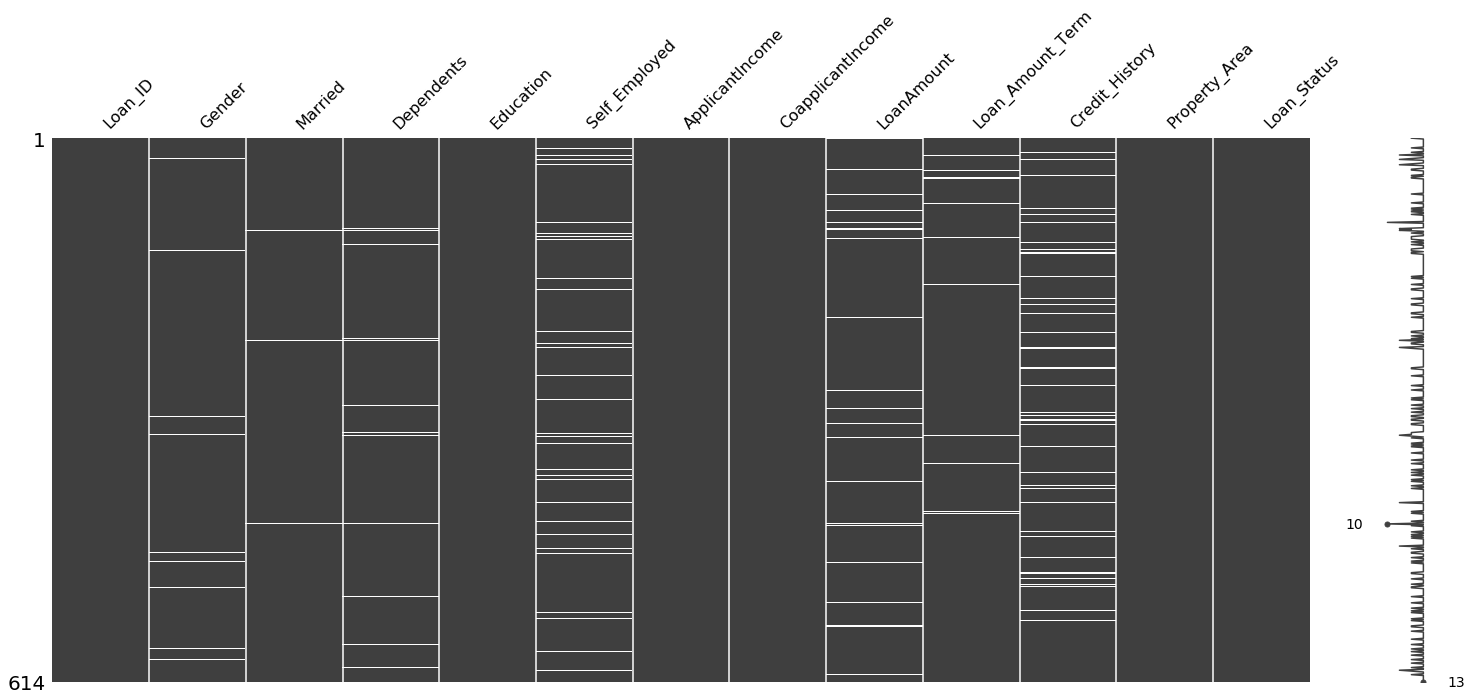

In [57]:
msno.matrix(loan_data) #matrix visualization of missing values in loan_data data frame

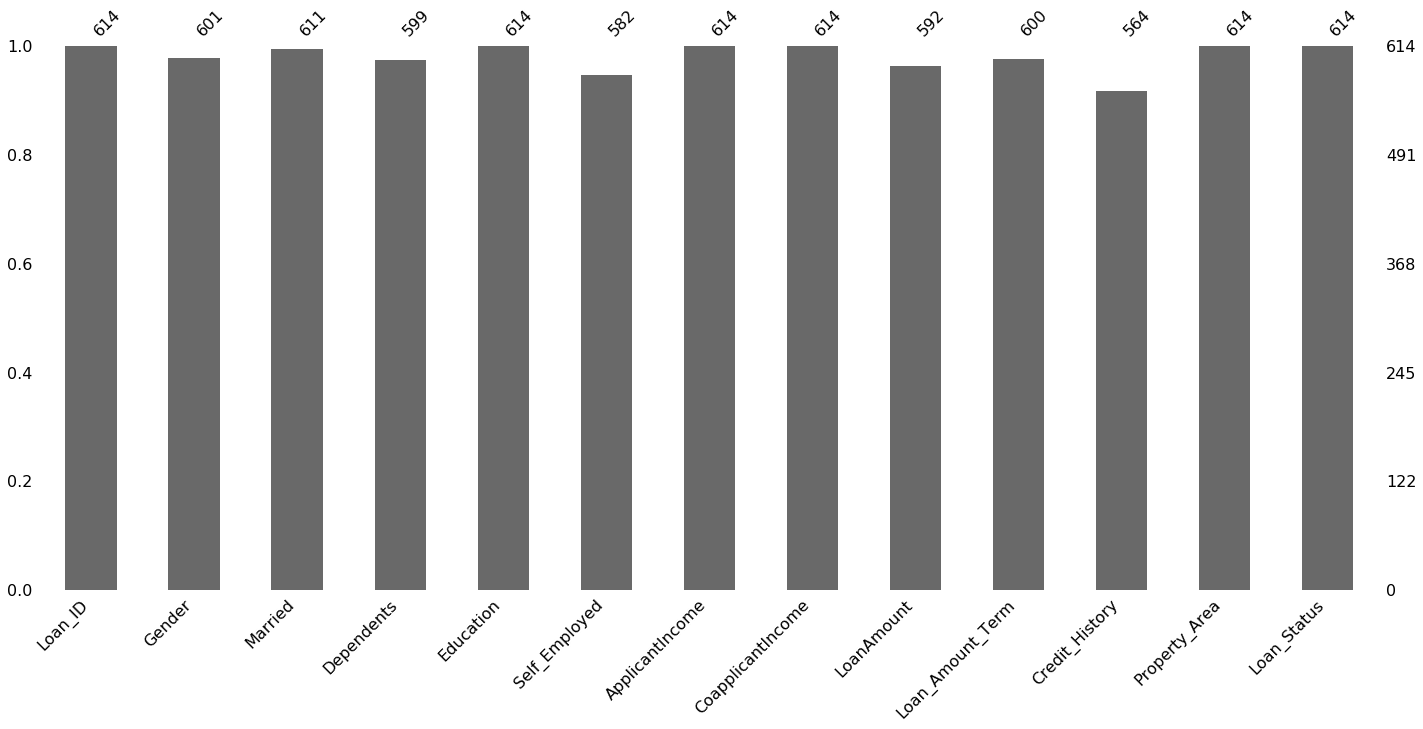

In [58]:
msno.bar(loan_data) #visual representation in bar format with not-null counts

### Print percentage of non-missing values in each feature 

In [59]:
null_cols_percent = []

for col in null_col_names:
    perc = loan_data[col].count()/len(loan_data)
    null_cols_percent.append(col + ': ' + str(perc))
null_cols_percent

['Gender: 0.9788273615635179',
 'Married: 0.995114006514658',
 'Dependents: 0.9755700325732899',
 'Self_Employed: 0.9478827361563518',
 'LoanAmount: 0.9641693811074918',
 'Loan_Amount_Term: 0.9771986970684039',
 'Credit_History: 0.9185667752442996']

In [60]:
# Alternate approach to compute the Not Null values percentage
null_cols_percent = [col + ': ' + str(loan_data[col].count()/len(loan_data)) for col in null_col_names]
null_cols_percent

['Gender: 0.9788273615635179',
 'Married: 0.995114006514658',
 'Dependents: 0.9755700325732899',
 'Self_Employed: 0.9478827361563518',
 'LoanAmount: 0.9641693811074918',
 'Loan_Amount_Term: 0.9771986970684039',
 'Credit_History: 0.9185667752442996']

## <a id='analyze_corr'>9. Analyzing Covariance and Correlation</a>

### Get the Covariance matrix from dataframe

In [61]:
# Generate a covariance matrix. This returns a dataframe
loan_data_cov = loan_data.cov()
loan_data_cov

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,3.732039e+07,-2.084490e+06,301192.495450,-18207.365609,-33.671724
CoapplicantIncome,-2.084490e+06,8.562930e+06,47909.140428,-11503.765339,-1.854510
LoanAmount,3.011925e+05,4.790914e+04,7325.190241,222.894173,-0.255510
Loan_Amount_Term,-1.820737e+04,-1.150377e+04,222.894173,4240.667780,0.034019
Credit_History,-3.367172e+01,-1.854510e+00,-0.255510,0.034019,0.133136


### Get the Correlation matrix from dataframe

In [62]:
# Generate a correlation matrix. This returns a dataframe
loan_data_corr = loan_data.corr()
loan_data_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Get the absolute value of correlation matrix 

In [63]:
# Compute correlation matrix and get the absolute value
loan_data_corr = loan_data.corr().abs()
loan_data_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.116605,0.570909,0.045306,0.014715
CoapplicantIncome,0.116605,1.000000,0.188619,0.059878,0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,0.008433
Loan_Amount_Term,0.045306,0.059878,0.039447,1.000000,0.001470
Credit_History,0.014715,0.002056,0.008433,0.001470,1.000000


In [64]:
# Print correlation matrix shape.
loan_data_corr.shape

(5, 5)

### Construct an unit matrix to the shape of correlation matrix 

In [65]:
np.ones(loan_data_corr.shape)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### Keep the upper diagonal triangle to 1 and others to 0

In [66]:
np.triu(np.ones(loan_data_corr.shape), k=1)

array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Convert the resultant matrix to boolean 

In [67]:
np.triu(np.ones(loan_data_corr.shape), k=1).astype(np.bool)

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

### Coerce the Correlation matrix to the above resultant matrix

In [68]:
loan_data_corr.where(np.triu(np.ones(loan_data_corr.shape), k=1).astype(np.bool), inplace=True)
loan_data_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,NaN,0.116605,0.570909,0.045306,0.014715
CoapplicantIncome,NaN,NaN,0.188619,0.059878,0.002056
LoanAmount,NaN,NaN,NaN,0.039447,0.008433
Loan_Amount_Term,NaN,NaN,NaN,NaN,0.001470
Credit_History,NaN,NaN,NaN,NaN,NaN


### Set Correlation threshold above which the columns have to be deleted from dataframe 

In [69]:
# In this dataset, 0.5 value is taken as threshold because we want to identify at least a feature that is highly correlated.
# Usual correlation range: 90 to 95% (0.90 to 0.95)
CORR_THRESHOLD = 0.5  

loan_data_corr = (loan_data_corr > CORR_THRESHOLD)
loan_data_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,False,False,True,False,False
CoapplicantIncome,False,False,False,False,False
LoanAmount,False,False,False,False,False
Loan_Amount_Term,False,False,False,False,False
Credit_History,False,False,False,False,False


### Export the correlation matrix into a CSV file 

In [70]:
# This snippet will save a CSV file in the local file system that can be opened as a spreadsheet
loan_data_corr.to_csv("loan_data_corr_matrix.csv")

### Correlation matrix - Heatmap 

In [71]:
# Compute correlation matrix 
loan_data_corr = loan_data.corr()

# Print color gradient plot 
loan_data_corr.style.background_gradient()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1,-0.116605,0.570909,-0.0453061,-0.0147149
CoapplicantIncome,-0.116605,1,0.188619,-0.059878,-0.00205628
LoanAmount,0.570909,0.188619,1,0.0394473,-0.00843277
Loan_Amount_Term,-0.0453061,-0.059878,0.0394473,1,0.00147011
Credit_History,-0.0147149,-0.00205628,-0.00843277,0.00147011,1


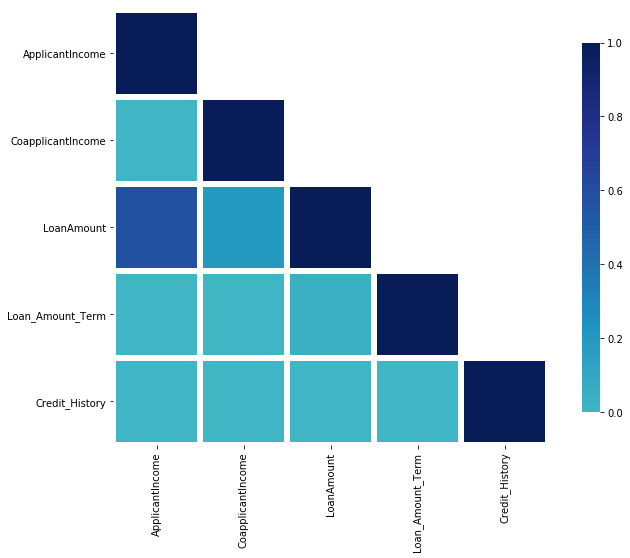

In [72]:
# Create a correlation matrix. It always returns a square matrix
corr = loan_data.corr()

# Set the plotting area/ size
plt.figure(figsize = (12, 8))

# Create a mask to hide the upper triangle
mask = np.triu(np.ones(corr.shape), k=1).astype(np.bool)

# Plot the heatmap
sns.heatmap(corr, cmap='YlGnBu', vmin=0, mask=mask, vmax=1, center=0, square=True, linewidths=5, cbar_kws={"shrink": .85})

### Correlation matrix - Heatmap with values

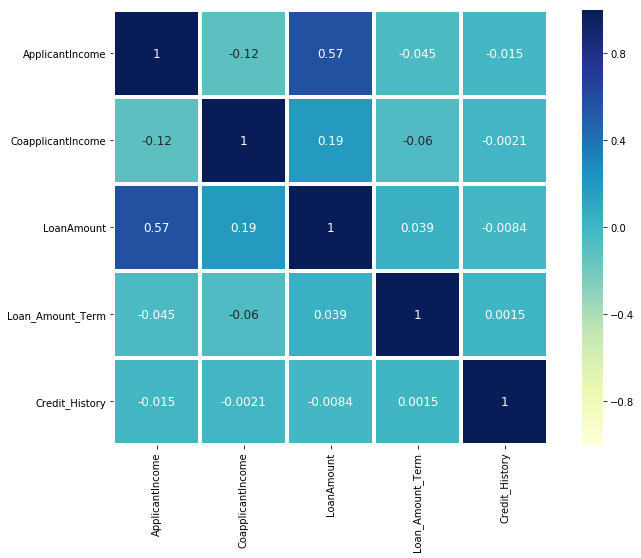

In [73]:
# Set the plotting area/ size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(loan_data_corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=3,
            annot=True, annot_kws={"size": 12}, square=True);

## <a id='analyze_distrib'>10. Analyzing data distribution - Univariate analysis</a> 

In univariate analysis, one feature is analyzed at a time to know more about the data spread, missing values, and outliers if any. This will provide some key insight to the feature. The most popular univariate plots are

- Histogram
- Box and Whisker plot

### Bar chart- Plot a Categorical feature containing 2 unique values

Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Index(['Yes', 'No', nan], dtype='object')
Yes
No
nan


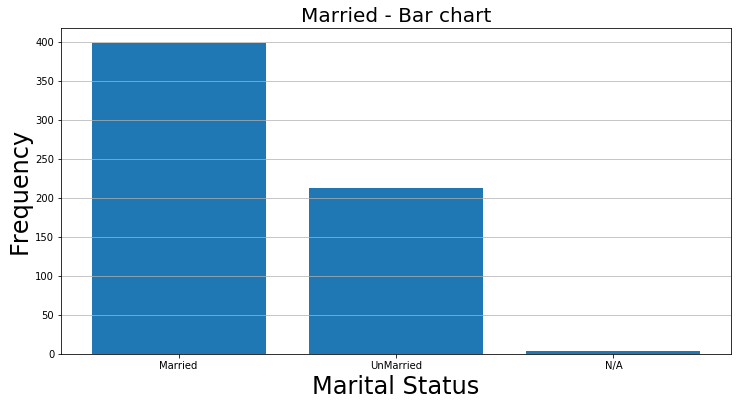

In [74]:
# Print the break-up of the feature
print(loan_data['Married'].value_counts(dropna=False))

married_data=loan_data['Married'].value_counts(dropna=False)
print(married_data)

index=married_data.index
print(index)

index_modified=[]
for status in index:
    print(status)
    if status=="Yes":
        index_modified.append("Married")
    elif status=="No":
        index_modified.append("UnMarried")
    else:
        index_modified.append("N/A")
        
    

# Set plotting area/ size
plt.figure(figsize=(12, 6))

# Plot histogram
plt.bar(index_modified,married_data)

# Set grid for X-axis
plt.grid(axis='y', alpha=0.9)

# Set X-axis label
plt.xlabel('Marital Status', fontdict={'fontsize': 24, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict={'fontsize': 24, 'fontweight': 'medium'})


# Set Bar chart title
plt.title('Married - Bar chart', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

### Histogram - Plot a Categorical feature containing more than 2 unique values

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


Text(2,220,'Dependents Bar chart')

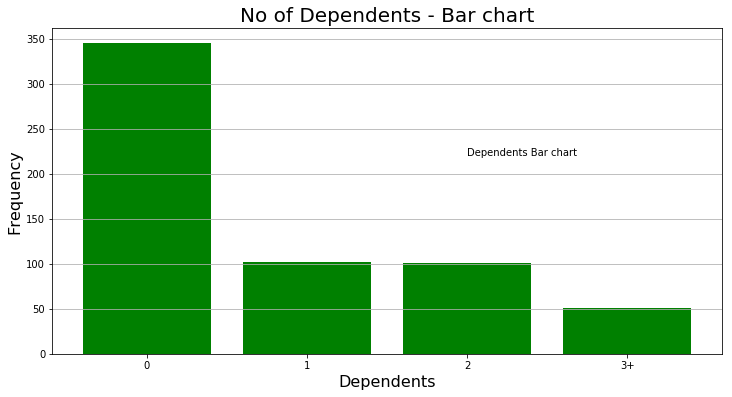

In [75]:
# Print the break-up of the feature
print(loan_data['Dependents'].value_counts(dropna=False)) 

dependents=loan_data['Dependents'].value_counts(dropna=True)

# Set plotting area/ size
plt.figure(figsize=(12,6))

# Plot bar chart
plt.bar(dependents.index,dependents,color="green")

# Set grid for X-axis
plt.grid(axis='y', alpha=0.99)

# Set X-axis label
plt.xlabel('Dependents', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Bar title
plt.title('No of Dependents - Bar chart', fontdict={'fontsize': 20, 'fontweight': 'medium'})

# Set bar extra text
plt.text(2, 220, 'Dependents Bar chart')

### Histogram - Plot a Numerical feature

6.539513113994625
60.54067593369113


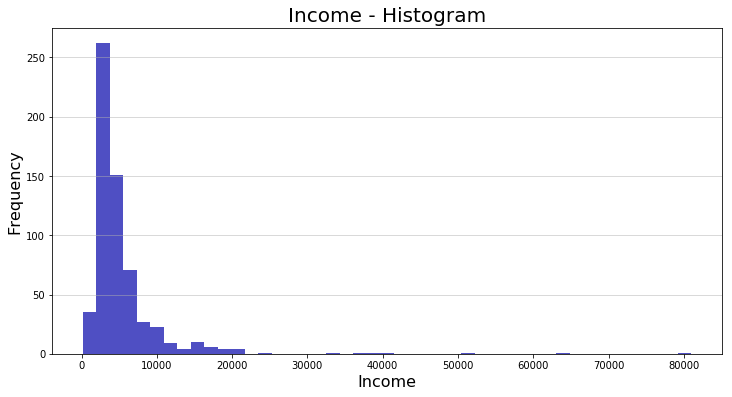

In [84]:
# Set plotting area/ size
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(x = loan_data['ApplicantIncome'], bins=45, color='#0504aa', alpha=0.7, rwidth=1)

# Set grid for Y-axis
plt.grid(axis='y', alpha=0.6)

# Set X-axis label
plt.xlabel('Income', fontdict = {'fontsize': 16, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict = {'fontsize': 16, 'fontweight': 'medium'})

# Set Histogram title
plt.title('Income - Histogram', fontdict = {'fontsize': 20, 'fontweight': 'medium'})

print(loan_data.ApplicantIncome.skew())  #skewness
print(loan_data.ApplicantIncome.kurt())  #kurtosis


### Histogram - Plot all the features (both numerical and categorical) in a dataset

In [87]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [117]:
s=loan_data["Credit_History"].value_counts()
print(s)
print(s.index)

new_index=[]
for item in s.index:
    new_index.append(str(item))
print(new_index)
    
    

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64
Index([1.0, 0.0, 'NaN'], dtype='object')
['1.0', '0.0', 'NaN']


rows:  4


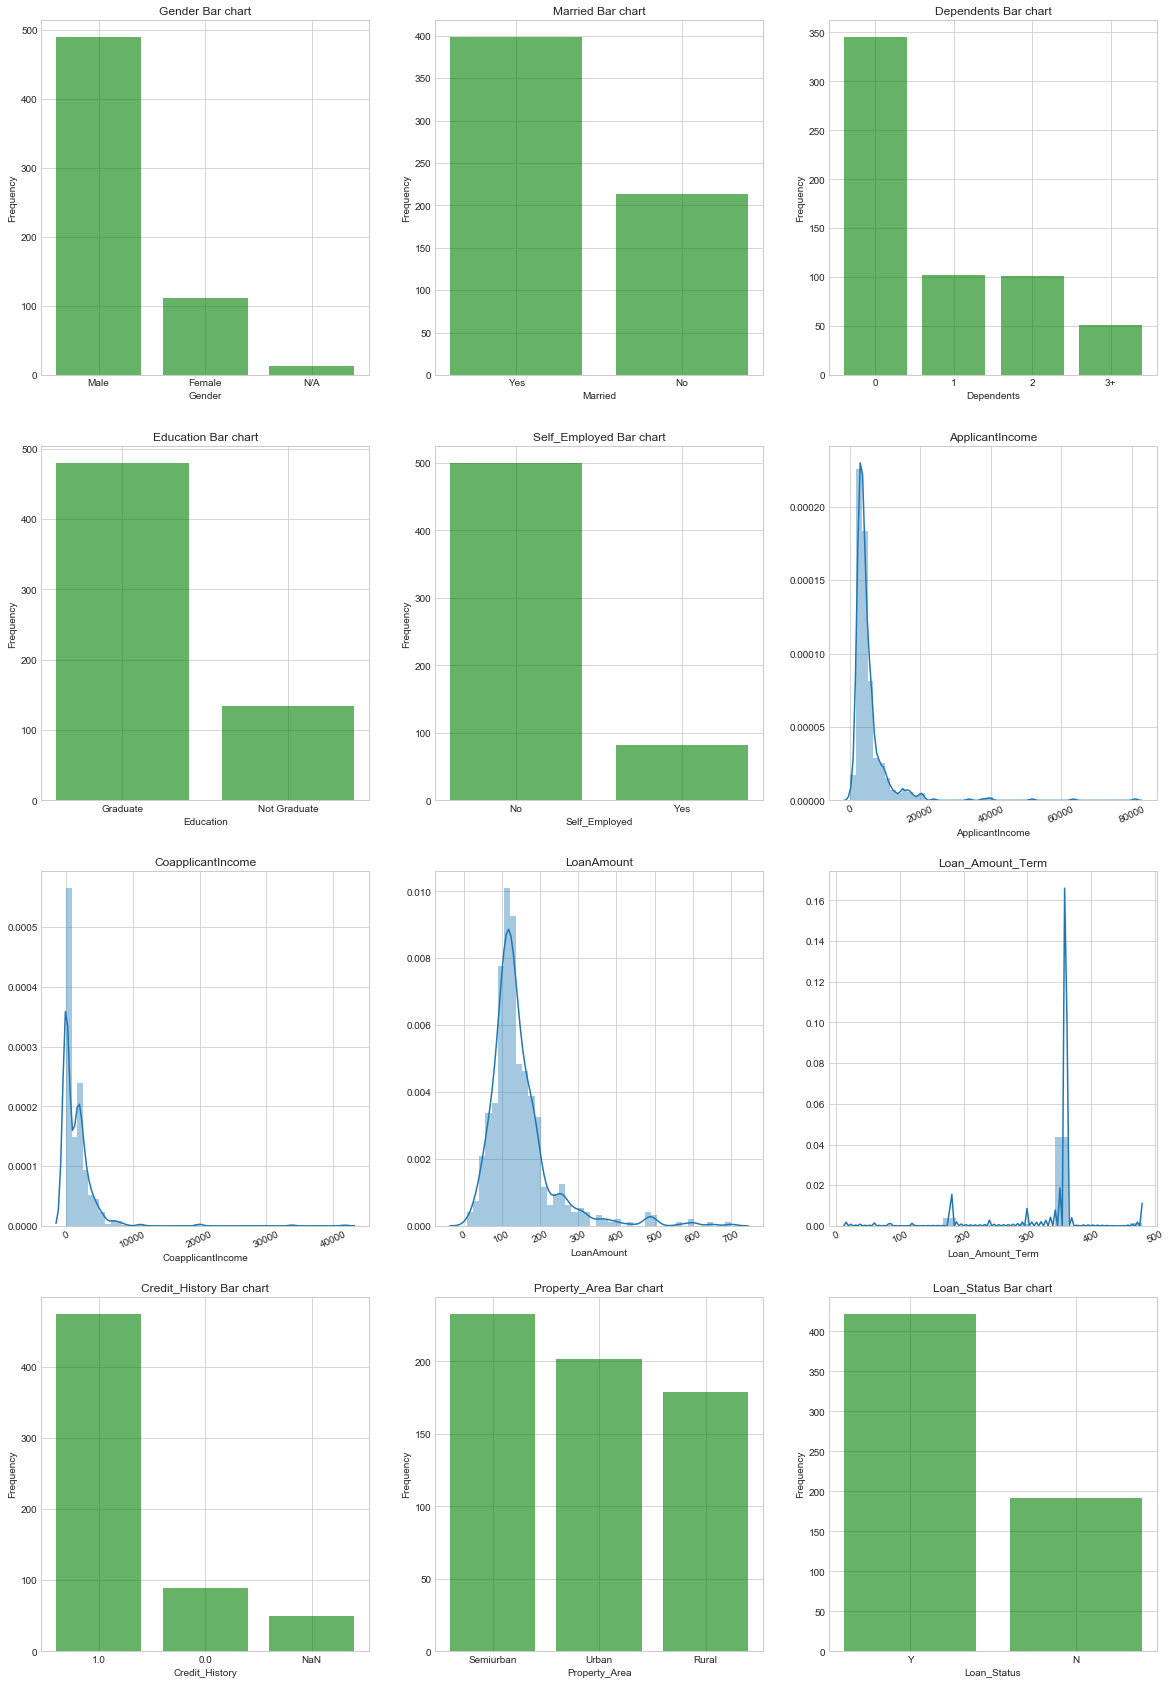

In [121]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define a method that draws univariate plot for all the features in a given dataset
def univariate_plot(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    
    # Set what plot style you want to use. seaborn-whitegrid, ggplot, etc.
    # Execute "print(plt.style.available)" to list the difference plotting styles that can be used.
    plt.style.use('seaborn-whitegrid')
    
    # Set the overall height and width of the plot. Remember the sizes are in inches.
    fig = plt.figure(figsize=(width, height))  # Default: Width=20, Height=15 plots in a row
    
    # Set the gap between each sub-plots. (width and height spaces)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # Compute no of rows required using total features extracted and col input
    rows = math.ceil(float(dataset.shape[1]) / cols) # Default 5 plots in a row
    print("rows: ",rows)
    
    # Notice that that we are extracting the column name and its position (i) using enumerator.
    for i, column in enumerate(dataset.columns):
        
        # The row and cols represent the grid structure of overall plot. The last param i represent the n-th plot
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Set the plot's title
        ax.set_title(column)
        
        # If datatype is Categorical (object) type, plot histogram
        if dataset.dtypes[column] == np.object:
            
            series=dataset[column].value_counts()
            
            # Credit_history column has floats..so, convert the index elements to str as otherwise causes errors
            new_index=[]
            for item in series.index:
                new_index.append(str(item))
            #print(new_index)
            
            # Plot histogram
            plt.bar(new_index,series,alpha=0.6,color="green")
            
            # Set grid for Y-axis
            plt.grid(axis='y', alpha=0.99)
            
            # Set X-axis label
            plt.xlabel(column)
            
            # Set Y-axis label
            plt.ylabel('Frequency')
            
            # Set Bar chart title
            plt.title(column + ' Bar chart')
 
        # If If datatype is Numerical (int64/ float64) type, plot univariate distribution
        else:
            
            # Plot distribution chart
            sns.distplot(dataset[column].dropna())
            
            # Set X-axis label with 25 deg rotation
            plt.xticks(rotation=25)
    

# Call the function to draw 
univariate_plot(loan_data.drop(['Loan_ID'], axis=1), cols=3, width=20, height=30, hspace=0.2, wspace=0.2)

### Box and Whisker plot

![Boxplot](img/boxplot.png)

### Plot Box and Whisker plot for a numerical feature

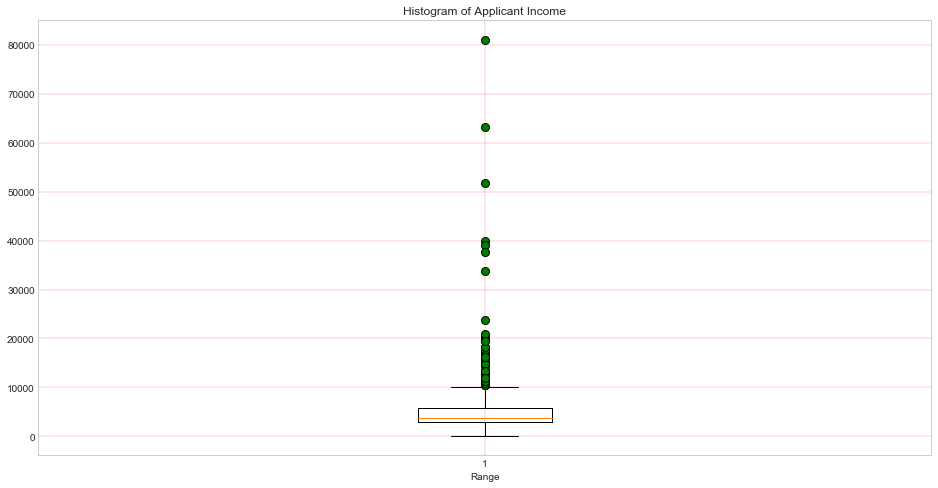

In [71]:
# Set plotting area/ size
plt.figure(figsize=(16,8))

# Extract feature to be Box-Whisker plotted
x = loan_data['ApplicantIncome']

# Define outlier's shape, color, and size
red_square = dict(marker='o', markerfacecolor='g', markersize=8)

# Plot Box-Whisker
plt.boxplot(x, vert=True, flierprops=red_square)

# Set X-axis label
plt.xlabel('Range')

# Set Box-Whisker title
plt.title('Box & Whisker plot of Applicant Income')

# Set grid properties for Box-Whisker plot
plt.grid(color='r', linestyle='-', linewidth=0.2)

### Homework: Plot Box-Whisker plot for the following features using `for loop`

- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`
- `Loan_Amount_Term`

In [135]:
def box_plot(dataset):
    # Set plotting area/ size
    fig=plt.figure(figsize=(16,8))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i,column in enumerate(dataset.columns):
        
        

        # Extract feature to be Box-Whisker plotted
        x = loan_data[column]

        # Define outlier's shape, color, and size
        red_square = dict(marker='o', markerfacecolor='g', markersize=8)

        # Plot Box-Whisker
        plt.subplot(2,2,i+1)
        plt.boxplot(x, vert=True, flierprops=red_square)

        # Set X-axis label
        plt.xlabel('Range')

        # Set Box-Whisker title
        plt.title('Box & Whisker plot of: '+ column,)

        # Set grid properties for Box-Whisker plot
        plt.grid(color='r', linestyle='-', linewidth=0.2)

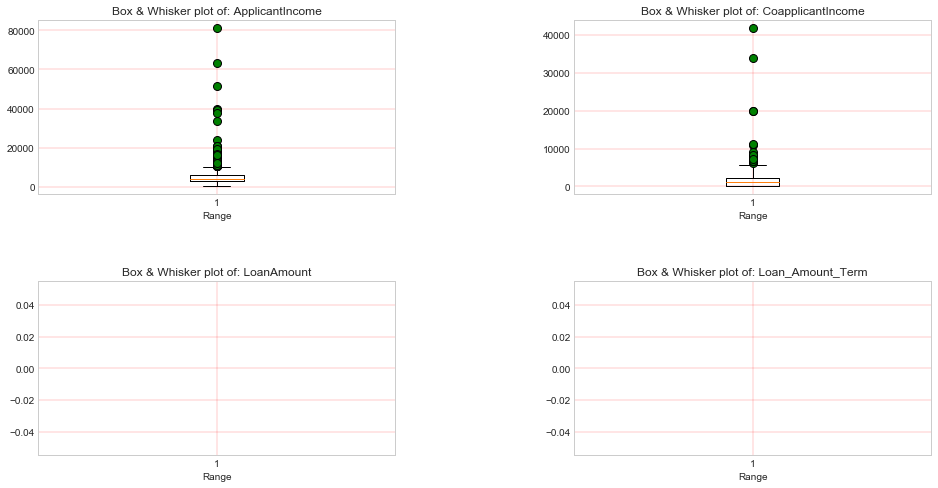

In [136]:
box_plot(loan_data[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]])

## <a id='analyze_scatter'>11. Analyzing data distribution - Bivariate Analysis</a>

In bivariate analysis, more than one features are analyzed together to see how they interact with each other. This will provide some key insight to the data, their relationship, and outliers if any. The most popular bivariate plots are

- Scatter plot
- Count (Bar) plot

### Scatter Plot - Loan Amount Term versus Loan Amount

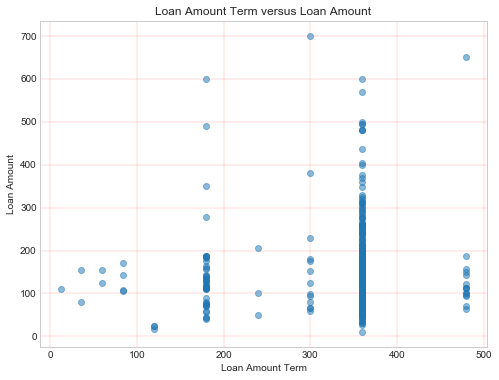

In [137]:
# Set plotting area/ size
plt.figure(figsize=(8,6))

# Plot scatter plot
plt.scatter(loan_data['Loan_Amount_Term'], loan_data['LoanAmount'], alpha = 0.5)

# Set X-axis label
plt.xlabel('Loan Amount Term')

# Set Y-axis label
plt.ylabel('Loan Amount')

# Set Scatterplot title
plt.title('Loan Amount Term versus Loan Amount')

# Set grid 
plt.grid(color='r', linestyle='-', linewidth=0.15)

### Scatter Plot - Loan Amount  versus Applicant Income and Total Income

Text(0.5,1,'Total Income versus Loan Amount')

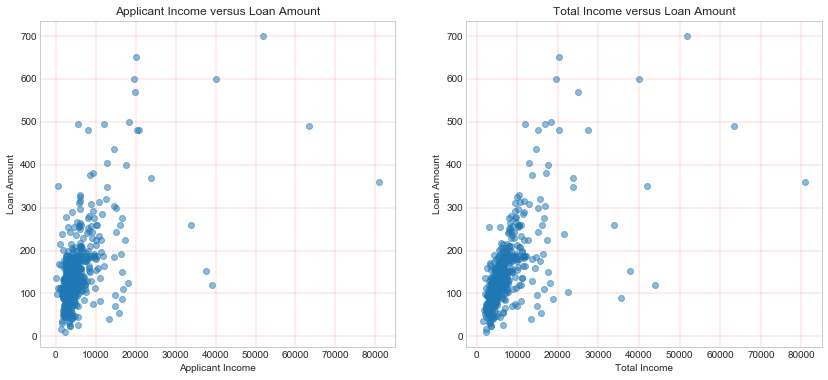

In [138]:
# Set plotting area/ size
plt.figure(1, figsize=(14, 6))

# Set first plot in a grid
plt.subplot(121)

# Plot scatter plot
plt.scatter(loan_data['ApplicantIncome'], loan_data['LoanAmount'], alpha = 0.5)

# Set X-axis label
plt.xlabel('Applicant Income')

# Set Y-axis label
plt.ylabel('Loan Amount')

# Set grid 
plt.grid(color='r', linestyle='-', linewidth=0.15)

# Set plot title 
plt.title('Applicant Income versus Loan Amount')

# --------------------------------------------------------------------------------
# Set second plot in a grid
plt.subplot(122)

# Plot scatter plot
plt.scatter(loan_data['ApplicantIncome']+loan_data['CoapplicantIncome'], loan_data['LoanAmount'], alpha = 0.5)

# Set X-axis label
plt.xlabel('Total Income')

# Set Y-axis label
plt.ylabel('Loan Amount')

# Set grid 
plt.grid(color='r', linestyle='-', linewidth=0.15)

# Set plot title 
plt.title('Total Income versus Loan Amount')

### Bar Plot - Credit History versus Loan Status

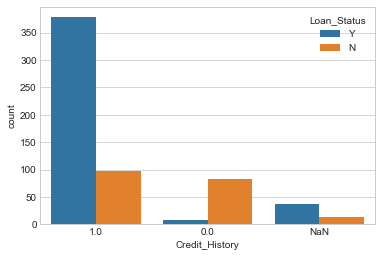

In [140]:
# The 'hue' helps compare a feature with the another one. In this case, a dependent variable.
sns.countplot(x='Credit_History',hue="Loan_Status",data=loan_data);

In [141]:
# Crosstab both features to see how they are distributed. Crosstab is similar to confusion matrix
pd.crosstab(loan_data['Loan_Status'], loan_data['Credit_History'])

Credit_History,0.0,1.0,NaN
Loan_Status,,,
N,82,97,13
Y,7,378,37


### Compare all the features w.r.t. dependent feature `Loan_Status`

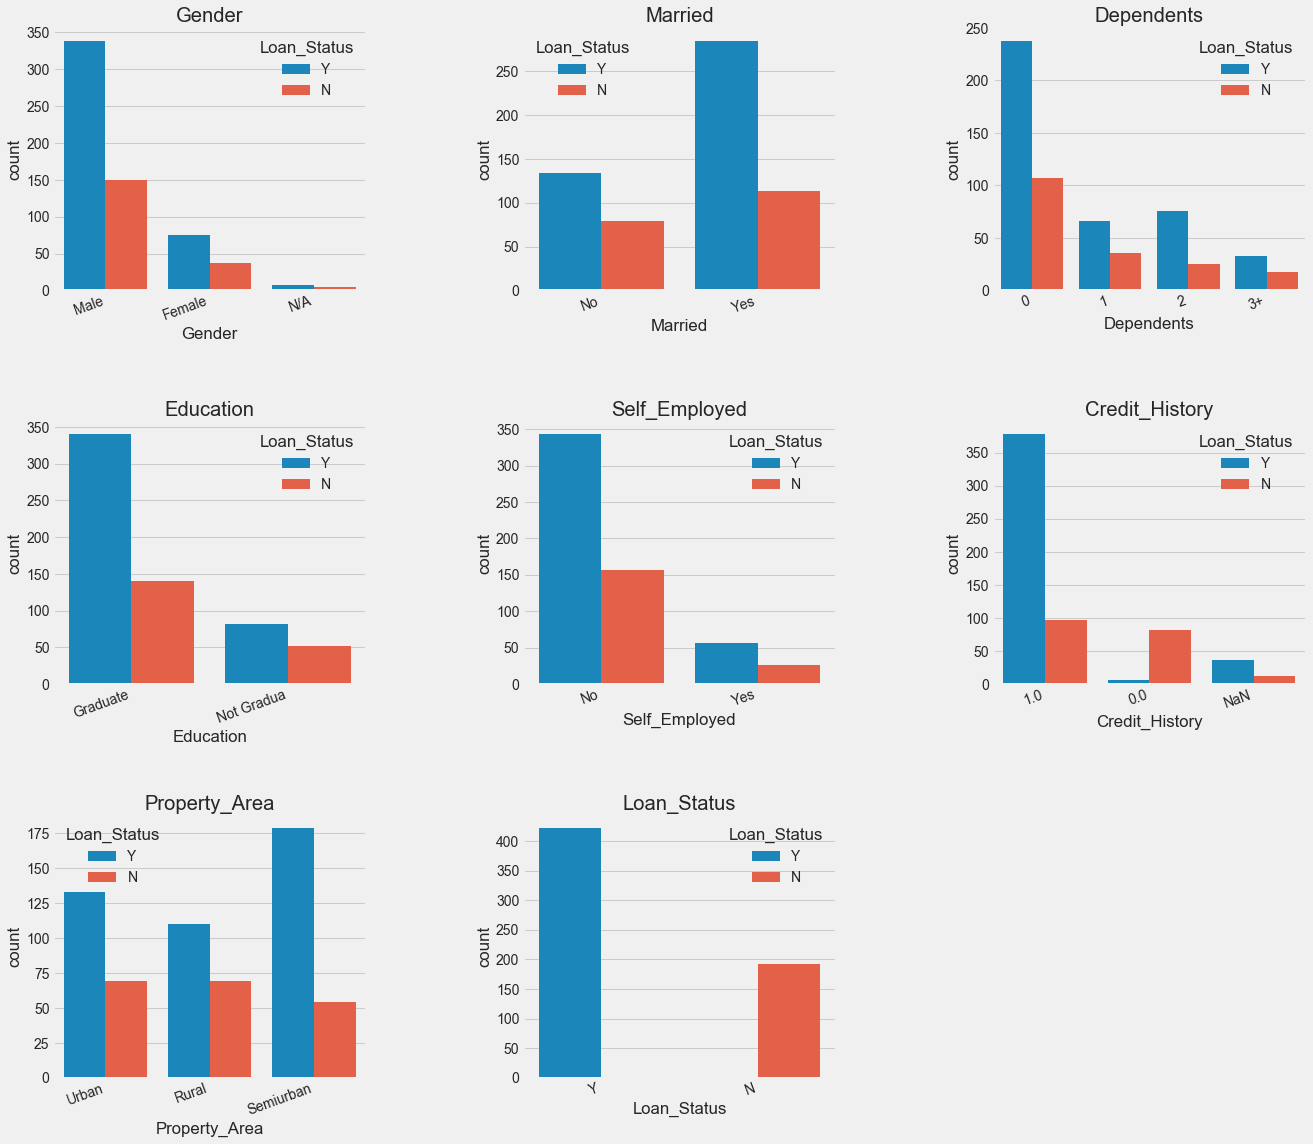

In [142]:
import math

# Plot a count of the categories from each categorical feature split by our prediction class: salary - predclass.
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    # Select the columns that are of type object (categorical features)
    dataset = dataset.select_dtypes(include=[np.object])
    
    # Set what plot style you want to use. seaborn-whitegrid, ggplot, etc.
    # Execute "print(plt.style.available)" to list the difference plotting styles that can be used.
    plt.style.use('fivethirtyeight')
    
    # Set the overall height and width of the plot. Remember the sizes are in inches.
    fig = plt.figure(figsize=(width, height))
    
    # Set the gap between each sub-plots. (width and height spaces)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # Compute no of rows required using total features extracted and col input
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    # Notice that that we are extracting the column name and its position (i) using enumerator.
    for i, column in enumerate(dataset.columns):
        
        # The row and cols represent the grid structure of overall plot. The last param i represent the n-th plot
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Set the plot's title
        ax.set_title(column)
        
        # Create plot 
        cplot = sns.countplot(x=column, hue=hue, data=dataset)
        
        # Limit the texts of X axis to 10 characters
        x_substr = [str.get_text()[:10] for str in cplot.get_xticklabels()]
        cplot.set_xticklabels(x_substr, rotation=20, ha="right")
        
            
# Call the function to draw 
plot_bivariate_bar(loan_data.drop(['Loan_ID'], axis=1), hue='Loan_Status', cols=3, width=20, height=18, hspace=0.5, wspace=0.5)

In [143]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## ========================================================================